In [2]:
import os
import pandas as pd
os.chdir("/gpfs/scratch/ahurtado/large_polar_low")
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()
dalton_reader.Np=4

72
72


In [3]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [4]:
#excluded=['C6H6']
#b=create_excited_comparison_data('d-aug-cc-pVQZ',excluded)
#display(b)

C2H4 converged:  0.0              True
0.0163076875     True
0.032615375     False
0.06523075      False
0.1304615       False
dtype: bool


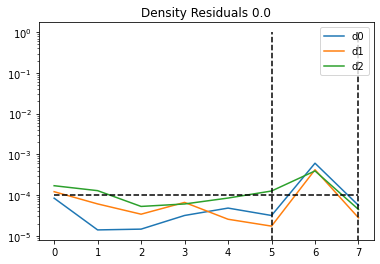

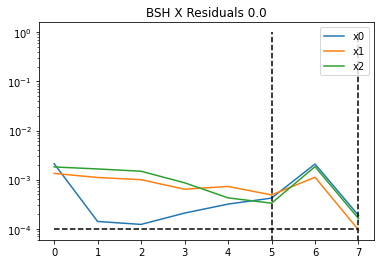

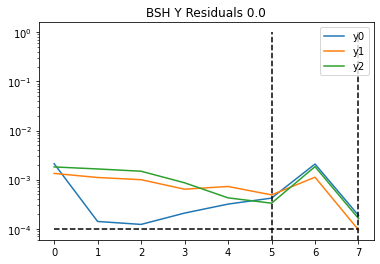

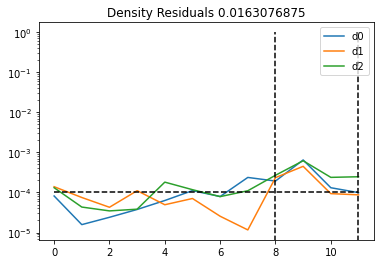

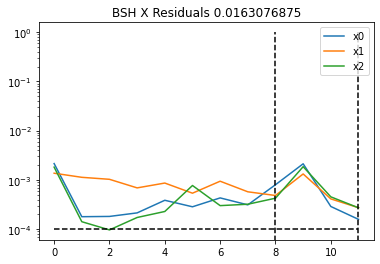

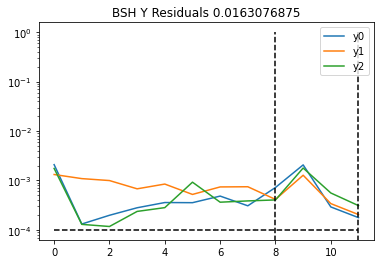

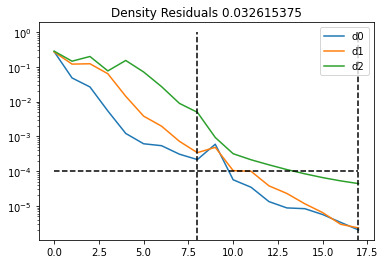

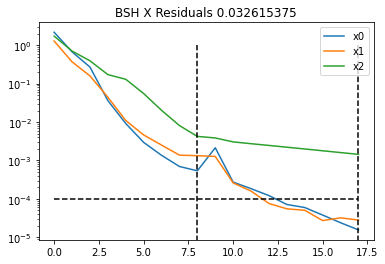

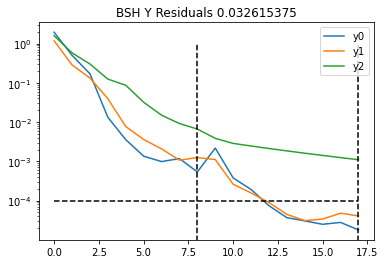

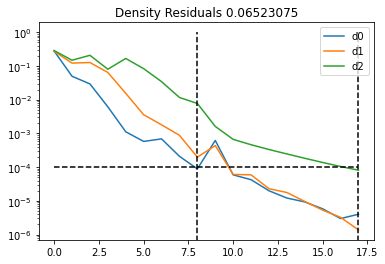

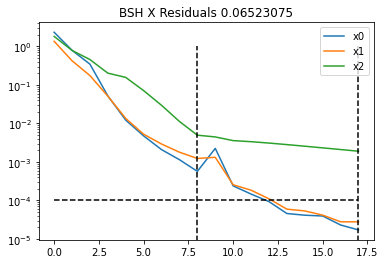

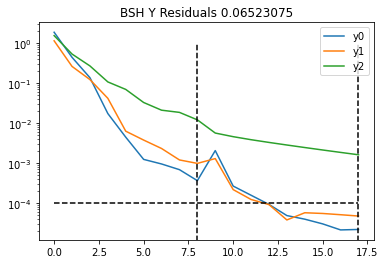

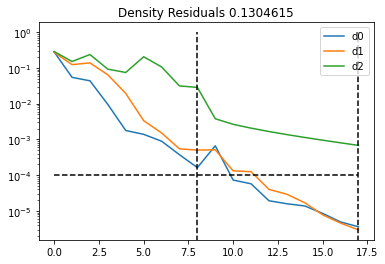

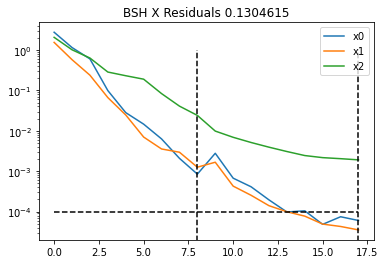

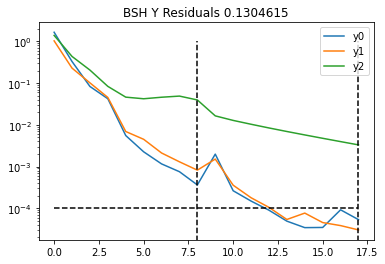

In [6]:
mol='C2H4'
d=display_convergence_plots(mol,'hf','dipole')
#create_polar_diff_plot(mol,basis_list[0:4])


In [ ]:
#average,diff,energy_diff,polar_diff=create_data('C6H6',['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ'])
#polar_diff.plot()

In [5]:
ben=FrequencyData(mol,'hf','dipole')
display(ben.polar_df)

,iterations,k,thresh,xx,xy,xz,yx,yy,yz,zx,zy,zz
0.0,7.0,8.0,0.000001,23.007563,-0.000014,-2.787829e-05,-5.662098e-06,24.818168,3.733628e-05,-0.000028,-5.763997e-08,36.959939
0.0163076875,11.0,8.0,0.000001,23.041998,-0.000077,-4.149961e-04,-3.300611e-06,24.841724,2.767486e-03,0.000027,3.149917e-04,37.037258
0.032615375,17.0,8.0,0.000001,23.146396,-0.000007,1.292540e-06,-5.671197e-07,24.910409,-3.852979e-08,0.000003,-1.167731e-08,37.263511
0.06523075,17.0,8.0,0.000001,23.581465,-0.000002,-9.626600e-07,-1.240932e-06,25.190192,5.636721e-08,0.000002,-1.207116e-08,38.236975
0.1304615,17.0,8.0,0.000001,25.673592,-0.000003,-1.331935e-06,-9.842710e-06,26.404396,3.134263e-09,-0.000001,-1.320395e-08,43.200145


In [7]:

ben=FrequencyData(mol,'hf','dipole')

In [12]:
mol='C2H4'
ben=FrequencyData(mol,'hf','dipole')
if !ben.converged.all():
    d=display_convergence_plots(mol,'hf','dipole')
    
    
    
    

False